In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to train and test data

In [2]:
train_path = "C:/Users/Magda/Documents/sy/archive (4)/sign_mnist_train.csv"
test_path = "C:/Users/Magda/Documents/sy/archive (4)/sign_mnist_test.csv"

# Load train data

In [3]:
train_data = pd.read_csv(train_path)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
train_labels = train_data['label']
train_data.drop('label', axis=1, inplace=True)
train_data = train_data.values.reshape((-1, 28, 28, 1))

In [6]:
train_labels.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

# Load test data

In [7]:
test_data = pd.read_csv(test_path)

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [9]:
test_labels = test_data['label']
test_data.drop('label', axis=1, inplace=True)
test_data = test_data.values.reshape((-1, 28, 28, 1))

In [10]:
test_labels.head()

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

# Encode labels using LabelBinarizer

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [12]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


# Normalize data

In [13]:
train_data = np.array(train_data).astype('float32') / 255.0
test_data = np.array(test_data).astype('float32') / 255.0

# Apply data augmentation

In [15]:
aug = ImageDataGenerator(rotation_range=30, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2,
                         shear_range=0.15, horizontal_flip=True,
                         fill_mode="nearest")

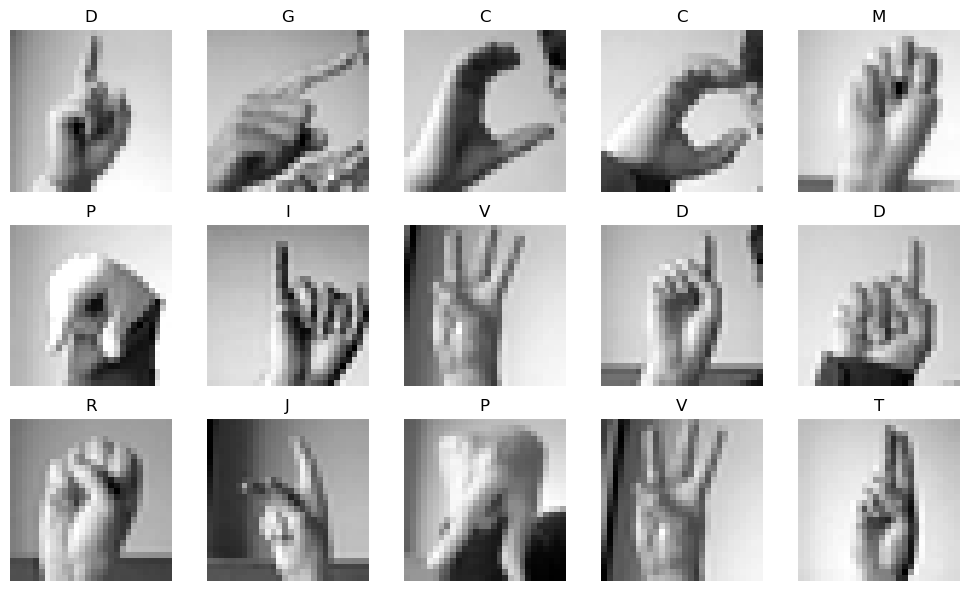

In [16]:
import matplotlib.pyplot as plt

# Define the mapping between label index and label name
label_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Display some sample images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data[i].squeeze(), cmap='gray')
    ax.set_title(label_names[np.argmax(train_labels[i])])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture

In [18]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

# Dense and output layers

In [19]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

# Compile the model

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model

In [21]:
model.fit(aug.flow(train_data,train_labels,batch_size=200),
         epochs = 125,
          validation_data=(test_data,test_labels),
          shuffle=1
         )

Epoch 1/125
138/138 [==============================] - 62s 441ms/step - loss: 3.0578 - accuracy: 0.0889 - val_loss: 2.6023 - val_accuracy: 0.1920
Epoch 2/125
138/138 [==============================] - 56s 405ms/step - loss: 2.4524 - accuracy: 0.2370 - val_loss: 1.7395 - val_accuracy: 0.4260
Epoch 3/125
138/138 [==============================] - 54s 390ms/step - loss: 1.9477 - accuracy: 0.3678 - val_loss: 1.2749 - val_accuracy: 0.5811
Epoch 4/125
138/138 [==============================] - 89s 648ms/step - loss: 1.6049 - accuracy: 0.4684 - val_loss: 0.9385 - val_accuracy: 0.6587
Epoch 5/125
138/138 [==============================] - 93s 674ms/step - loss: 1.3544 - accuracy: 0.5488 - val_loss: 0.7889 - val_accuracy: 0.7221
Epoch 6/125
138/138 [==============================] - 96s 694ms/step - loss: 1.1989 - accuracy: 0.5962 - val_loss: 0.7421 - val_accuracy: 0.7319
Epoch 7/125
138/138 [==============================] - 94s 678ms/step - loss: 1.0420 - accuracy: 0.6479 - val_loss: 0.6141 -